<a href="https://colab.research.google.com/github/Pablopooo/EDA_FundamentosML_PabloRiquelme/blob/main/Analisis_de_datos_corregido.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [31]:
# Importando las herramientas esenciales
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from scipy import stats
import warnings

# Silenciando las advertencias
warnings.simplefilter('ignore')

# Personalizando el estilo de las gráficas
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_theme(style="whitegrid")

# Ajustando la visualización de DataFrames
pd.set_option('display.max_columns', None)

### Carga del dataset

Para este análisis, utilizaremos el dataset de Customer Personality Analysis disponible en Kaggle.

In [17]:
# Cargar el dataset

from google.colab import files
uploaded = files.upload() # Sube el archivo del dataset
df = pd.read_csv('marketing_campaign.csv', sep='\t')
# Mostrar las primeras filas del dataset
print("Primeras 5 filas del dataset:")
df.head()

Saving marketing_campaign.csv to marketing_campaign (4).csv
Primeras 5 filas del dataset:


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0


## 1. Exploración inicial y tipos de datos

In [32]:
# Información general del dataset
print("\nInformación general del dataset:")
df.info()

# Descripción estadística básica
print("\nEstadísticas descriptivas básicas:")
df.describe()

# Verificar valores nulos
print("\nCantidad de valores nulos por columna:")
df.isnull().sum()


Información general del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 36 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2240 non-null   int64         
 1   Year_Birth           2240 non-null   int64         
 2   Education            2240 non-null   category      
 3   Marital_Status       2240 non-null   category      
 4   Income               2240 non-null   float64       
 5   Kidhome              2240 non-null   int64         
 6   Teenhome             2240 non-null   int64         
 7   Dt_Customer          2240 non-null   object        
 8   Recency              2240 non-null   int64         
 9   MntWines             2240 non-null   int64         
 10  MntFruits            2240 non-null   int64         
 11  MntMeatProducts      2240 non-null   int64         
 12  MntFishProducts      2240 non-null   int64         
 13 

,0
ID,0
Year_Birth,0
Education,0
Marital_Status,0
Income,0
Kidhome,0
Teenhome,0
Dt_Customer,0
Recency,0
MntWines,0


### 1.1 Identificación y clasificación de variables

Es fundamental identificar correctamente los tipos de variables para aplicar los análisis estadísticos adecuados:

In [33]:
print("\n--- Identificación de Tipos de Variables ---")

# Listado de variables cuantitativas continuas
variables_continuas = ['Income', 'Recency', 'MontoVinos', 'MontoFrutas', 'MontoCarnes',
                       'MontoPescados', 'MontoDulces', 'MontoOro']
# Listado de variables cuantitativas discretas
variables_discretas = ['AnioNacimiento', 'HijosEnCasa', 'AdolescentesEnCasa', 'FechaCliente',
                       'NumOfertasCompradas', 'NumComprasWeb', 'NumComprasCatalogo',
                       'NumComprasTienda', 'NumVisitasWebMes', 'AceptoCampaña1',
                       'AceptoCampaña2', 'AceptoCampaña3', 'AceptoCampaña4', 'AceptoCampaña5',
                       'Queja', 'Respuesta']
# Listado de variables cualitativas nominales
variables_nominales = ['Marital_Status', 'Education']
# Listado de variables cualitativas ordinales
variables_ordinales = []

print("Variables cualitativas nominales:", variables_nominales)
print("Variables cualitativas ordinales:", variables_ordinales)

# Transformando variables categóricas a su tipo apropiado
for columna in variables_nominales + variables_ordinales:
    df[columna] = df[columna].astype('category')


--- Identificación de Tipos de Variables ---
Variables cualitativas nominales: ['Marital_Status', 'Education']
Variables cualitativas ordinales: []


### 1.2 Preprocesamiento básico de datos

Antes de continuar con el análisis, realizaremos algunos pasos de preprocesamiento:

In [34]:
# Inspección y manejo de valores faltantes
print("\nConteo de valores nulos por columna:")
conteo_nulos = df.isnull().sum()
print(conteo_nulos[conteo_nulos > 0])

df['Income'].fillna(df['Income'].median(), inplace=True)

# Transformación de 'Dt_Customer' a formato fecha y cálculo de antigüedad
df['Fecha_Inscripcion'] = pd.to_datetime(df['Dt_Customer'], format='%d-%m-%Y')
fecha_referencia = pd.Timestamp('2015-01-01')
df['Dias_Como_Cliente'] = (fecha_referencia - df['Fecha_Inscripcion']).dt.days
# Se asume '2015-01-01' como el punto temporal de referencia del estudio

# Cálculo de la edad del cliente
anio_actual = 2015
df['Edad'] = anio_actual - df['Year_Birth']

# Cálculo del monto total gastado por cliente
df['Gasto_Total'] = df[['MntWines', 'MntFruits', 'MntMeatProducts',
                        'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].sum(axis=1)

# Cálculo del número total de hijos por hogar
df['Total_Hijos'] = df['Kidhome'] + df['Teenhome']

# Cálculo del número total de compras realizadas
df['Total_Compras'] = df[['NumDealsPurchases', 'NumWebPurchases',
                           'NumCatalogPurchases', 'NumStorePurchases']].sum(axis=1)

# Cálculo del número total de campañas aceptadas
df['Campañas_Aceptadas'] = df[['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3',
                                'AcceptedCmp4', 'AcceptedCmp5', 'Response']].sum(axis=1)

# Confirmación de la ausencia de valores nulos
print("\nConfirmación final de valores nulos:")
print(df.isnull().sum().sum())


Conteo de valores nulos por columna:
Series([], dtype: int64)

Confirmación final de valores nulos:
0


## 2. Análisis estadístico descriptivo

### 2.1 Medidas de tendencia central y dispersión para variables numéricas

In [39]:
# Selección de atributos numéricos relevantes para el estudio
atributos_numericos = ['Edad', 'Income', 'Total_Hijos', 'Gasto_Total',
                      'MntWines', 'MntFruits', 'MntMeatProducts',
                      'MntFishProducts', 'MntSweetProducts', 'Recency',
                      'NumWebVisitsMonth', 'Total_Compras', 'Campañas_Aceptadas']

# Resumen estadístico detallado de los atributos numéricos
print("\n--- Estadísticas descriptivas de los atributos numéricos ---")
resumen_estadistico = df[atributos_numericos].describe(percentiles=[.01, .05, .25, .5, .75, .95, .99])
resumen_estadistico = resumen_estadistico.T  # Transposición para una mejor lectura
resumen_estadistico['cv'] = resumen_estadistico['std'] / resumen_estadistico['mean']  # Coeficiente de variación
resumen_estadistico['skew'] = df[atributos_numericos].skew()  # Asimetría
resumen_estadistico['kurt'] = df[atributos_numericos].kurtosis()  # Curtosis
resumen_estadistico = resumen_estadistico.round(2)  # Redondeo para claridad
print(resumen_estadistico)

# Función para obtener la moda
def get_mode(x):
    mode_result = stats.mode(x)
    if hasattr(mode_result, 'mode'):  # For scipy < 1.9.0
        return mode_result.mode[0] if isinstance(mode_result.mode, np.ndarray) else mode_result.mode
    else:  # For scipy >= 1.9.0
        return mode_result.mode

# Cálculo y visualización de la moda
print("\n--- Moda de los atributos numéricos ---")
modes = {col: get_mode(df[col].dropna()) for col in atributos_numericos}
for col, mode_val in modes.items():
    print(f"{col}: {mode_val}")

# Análisis de la forma de distribución de variables clave
print("\n--- Análisis de distribución y sesgo de variables clave ---")
variables_analisis = ['Edad', 'Income', 'Gasto_Total', 'Campañas_Aceptadas'] # Use the correct column names
for col in variables_analisis:
    skew = df[col].skew()
    kurt = df[col].kurtosis()
    print(f"{col}:")
    print(f"  Asimetría (Skewness): {skew:.2f} - ", end="")
    if skew > 0.5:
        print("Sesgo positivo significativo (cola a la derecha)")
    elif skew < -0.5:
        print("Sesgo negativo significativo (cola a la izquierda)")
    else:
        print("Distribución aproximadamente simétrica")

    print(f"  Curtosis: {kurt:.2f} - ", end="")
    if kurt > 0.5:
        print("Leptocúrtica (más apuntada que la normal)")
    elif kurt < -0.5:
        print("Platicúrtica (más aplanada que la normal)")
    else:
        print("Mesocúrtica (similar a la normal)")
    print()


--- Estadísticas descriptivas de los atributos numéricos ---
                     count      mean       std     min       1%        5%  \
Edad                2240.0     46.19     11.98    19.0    23.00     27.00   
Income              2240.0  52237.98  25037.96  1730.0  7705.92  19101.05   
Total_Hijos         2240.0      0.95      0.75     0.0     0.00      0.00   
Gasto_Total         2240.0    605.80    602.25     5.0    13.00     22.00   
MntWines            2240.0    303.94    336.60     0.0     1.00      3.00   
MntFruits           2240.0     26.30     39.77     0.0     0.00      0.00   
MntMeatProducts     2240.0    166.95    225.72     0.0     2.00      4.00   
MntFishProducts     2240.0     37.53     54.63     0.0     0.00      0.00   
MntSweetProducts    2240.0     27.06     41.28     0.0     0.00      0.00   
Recency             2240.0     49.11     28.96     0.0     0.00      4.00   
NumWebVisitsMonth   2240.0      5.32      2.43     0.0     1.00      1.00   
Total_Compras 

### 2.2 Análisis de variables categóricas

In [40]:
# Exploración de variables cualitativas
print("\n--- Exploración de variables cualitativas ---")

# Distribución de frecuencia para variables nominales
for columna in categoricas_nominales:
    print(f"\nDistribución de frecuencia para {columna}:")
    frecuencia_absoluta = df[columna].value_counts()
    frecuencia_relativa = (df[columna].value_counts(normalize=True) * 100).round(2)
    tabla_frecuencia = pd.DataFrame({
        'Frecuencia': frecuencia_absoluta,
        'Porcentaje (%)': frecuencia_relativa
    })
    print(tabla_frecuencia)
    moda_valor = frecuencia_absoluta.index[0]
    conteo_moda = frecuencia_absoluta.iloc[0]
    print(f"Moda: {moda_valor} (conteo: {conteo_moda})")

# Resumen de variables dicotómicas
variables_binarias = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4',
                      'AcceptedCmp5', 'Response', 'Complain']

print("\n--- Resumen de variables dicotómicas (campañas y quejas) ---")
resumen_binario = pd.DataFrame({
    'Total_Positivo': [df[col].sum() for col in variables_binarias],
    'Porcentaje_Positivo (%)': [(df[col].sum() / len(df) * 100).round(2) for col in variables_binarias]
}, index=variables_binarias)
print(resumen_binario)


--- Exploración de variables cualitativas ---

Distribución de frecuencia para Marital_Status:
                Frecuencia  Porcentaje (%)
Marital_Status                            
Married                864           38.57
Together               580           25.89
Single                 480           21.43
Divorced               232           10.36
Widow                   77            3.44
Alone                    3            0.13
Absurd                   2            0.09
YOLO                     2            0.09
Moda: Married (conteo: 864)

Distribución de frecuencia para Education:
            Frecuencia  Porcentaje (%)
Education                             
Graduation        1127           50.31
PhD                486           21.70
Master             370           16.52
2n Cycle           203            9.06
Basic               54            2.41
Moda: Graduation (conteo: 1127)

--- Resumen de variables dicotómicas (campañas y quejas) ---
              Total_Positivo  Porce

## 3. Visualizaciones para el análisis

### 3.1 Distribuciones de variables numéricas clave

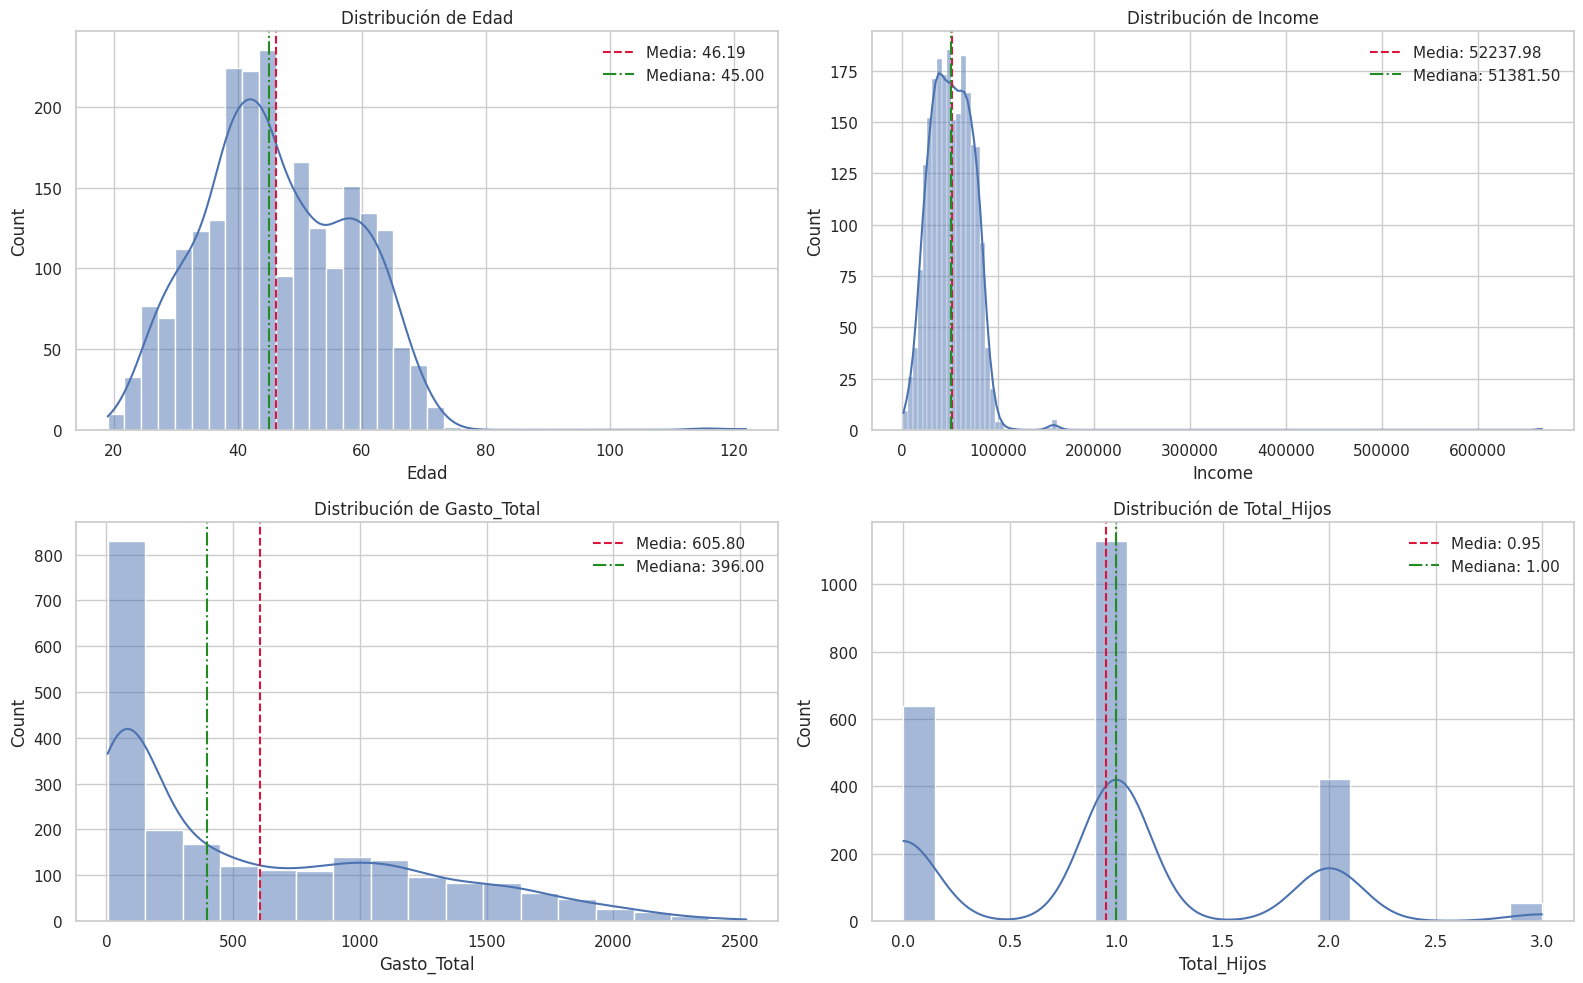

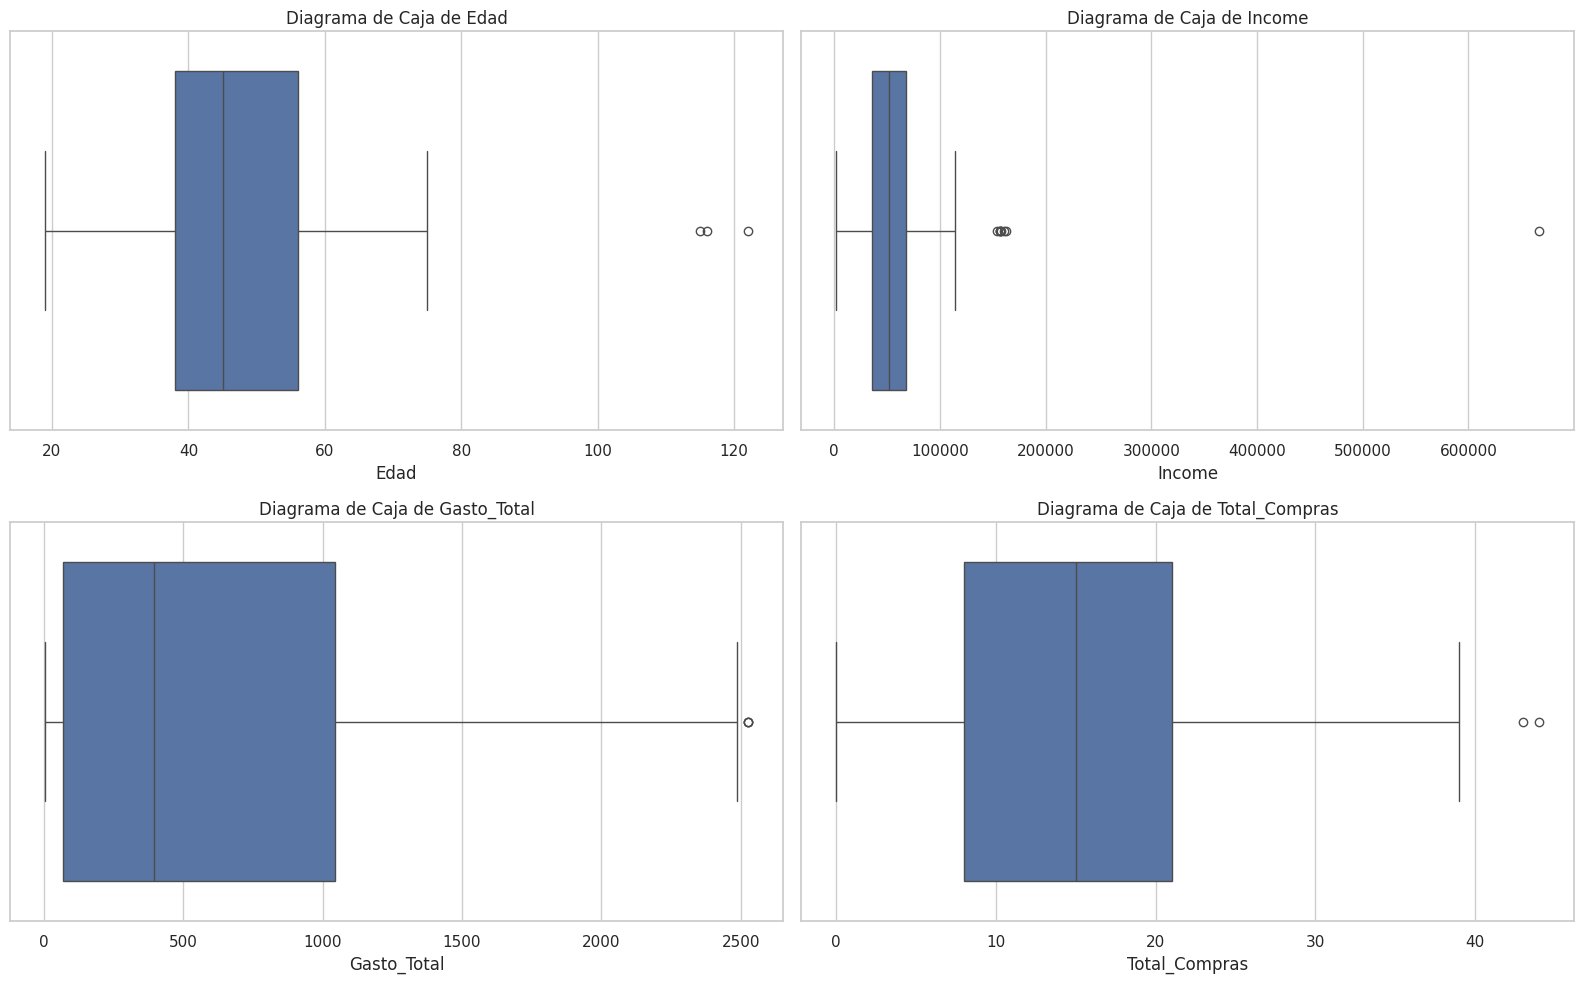

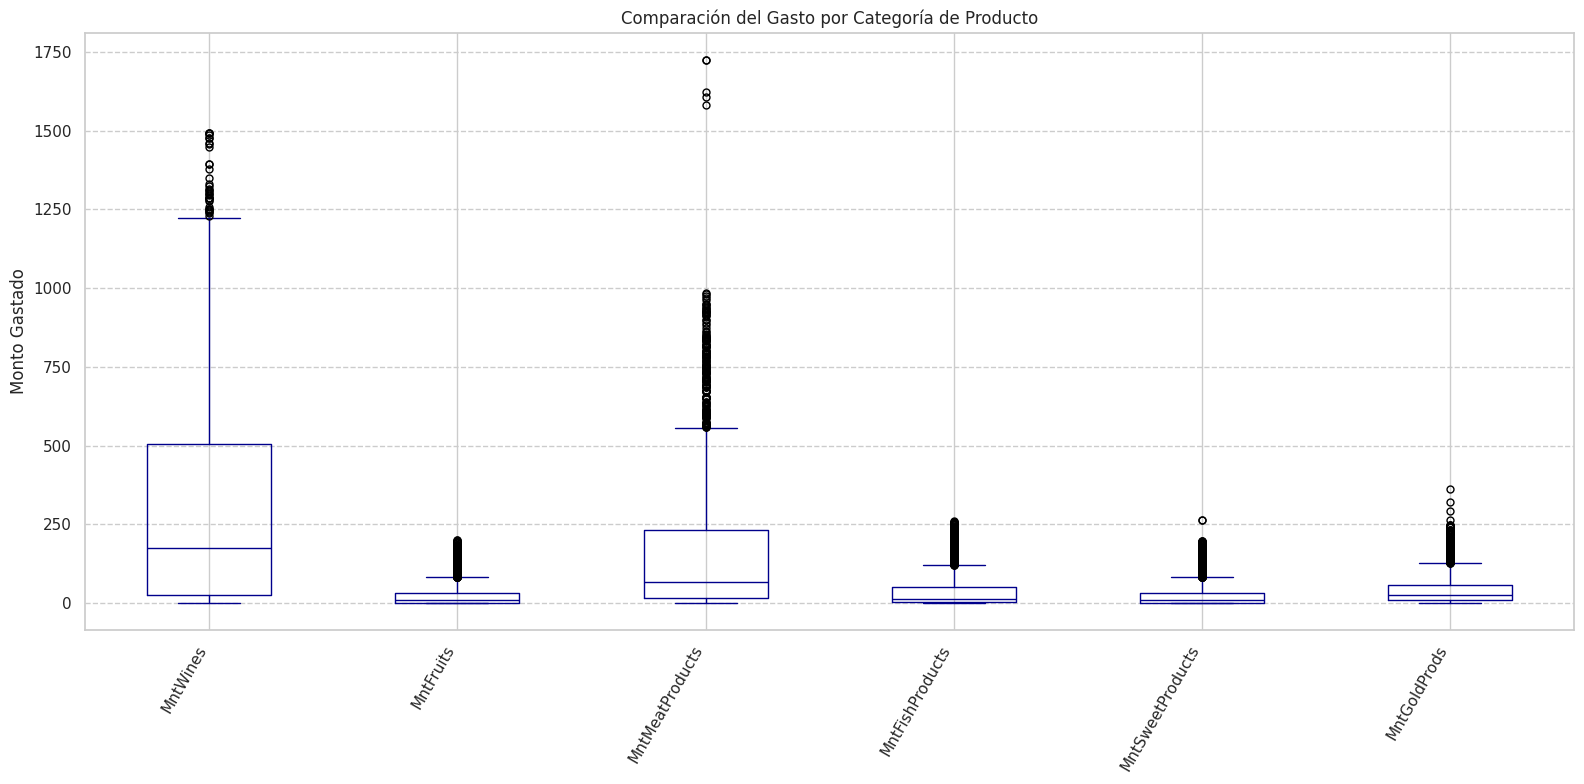

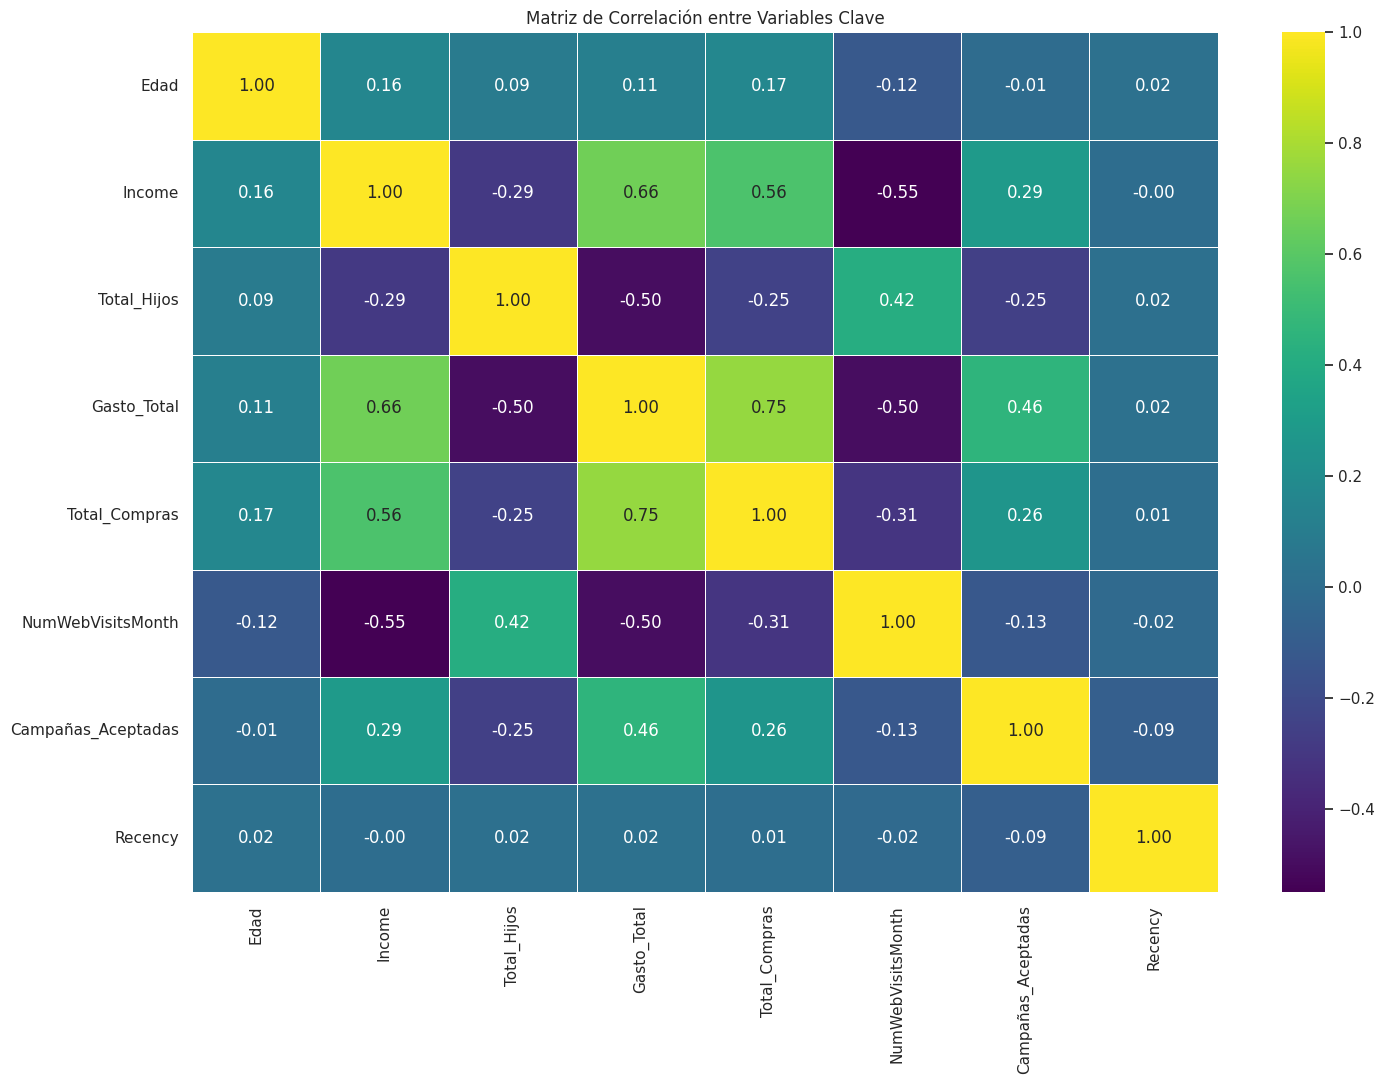

In [44]:
# Preparación para las visualizaciones
plt.figure(figsize=(16, 10))

# Distribución de variables numéricas clave
variables_clave = ['Edad', 'Income', 'Gasto_Total', 'Total_Hijos'] # Changed 'Ingresos' to 'Income'
for indice, variable in enumerate(variables_clave):
    plt.subplot(2, 2, indice + 1)
    sns.histplot(df[variable], kde=True)
    plt.title(f'Distribución de {variable}')
    plt.axvline(df[variable].mean(), color='crimson', linestyle='--', label=f'Media: {df[variable].mean():.2f}')
    plt.axvline(df[variable].median(), color='forestgreen', linestyle='-.', label=f'Mediana: {df[variable].median():.2f}')
    plt.legend()

plt.tight_layout()
plt.savefig('distribuciones_atributos_numericos.png')
plt.show()

# Diagramas de caja para identificar valores atípicos en atributos numéricos
plt.figure(figsize=(16, 10))

atributos_boxplot = ['Edad', 'Income', 'Gasto_Total', 'Total_Compras']
for indice, atributo in enumerate(atributos_boxplot):
    plt.subplot(2, 2, indice + 1)
    sns.boxplot(x=df[atributo])
    plt.title(f'Diagrama de Caja de {atributo}')
    plt.grid(axis='x', linestyle='-')

plt.tight_layout()
plt.savefig('diagramas_caja_outliers.png')
plt.show()
# Comparativa del gasto en diferentes categorías de productos
columnas_gasto = ['MntWines', 'MntFruits', 'MntMeatProducts',
                  'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']

plt.figure(figsize=(16, 8))
df[columnas_gasto].boxplot(color='darkblue', flierprops={'marker': 'o', 'markersize': 5})
plt.title('Comparación del Gasto por Categoría de Producto')
plt.ylabel('Monto Gastado')
plt.xticks(rotation=60, ha='right')
plt.grid(axis='y', linestyle='--')
plt.tight_layout()
plt.savefig('comparativa_gastos_productos.png')
plt.show()

# Visualización de la matriz de correlación entre variables relevantes
plt.figure(figsize=(15, 11))
variables_correlacion = ['Edad', 'Income', 'Total_Hijos', 'Gasto_Total', 'Total_Compras',
                         'NumWebVisitsMonth', 'Campañas_Aceptadas', 'Recency']
matriz_correlacion = df[variables_correlacion].corr(method='pearson')
sns.heatmap(matriz_correlacion, annot=True, cmap='viridis', fmt='.2f', linewidths=.7, linecolor='white')
plt.title('Matriz de Correlación entre Variables Clave')
plt.tight_layout()
plt.savefig('matriz_correlacion_variables.png')
plt.show()

### 3.2 Análisis por estado civil y educación

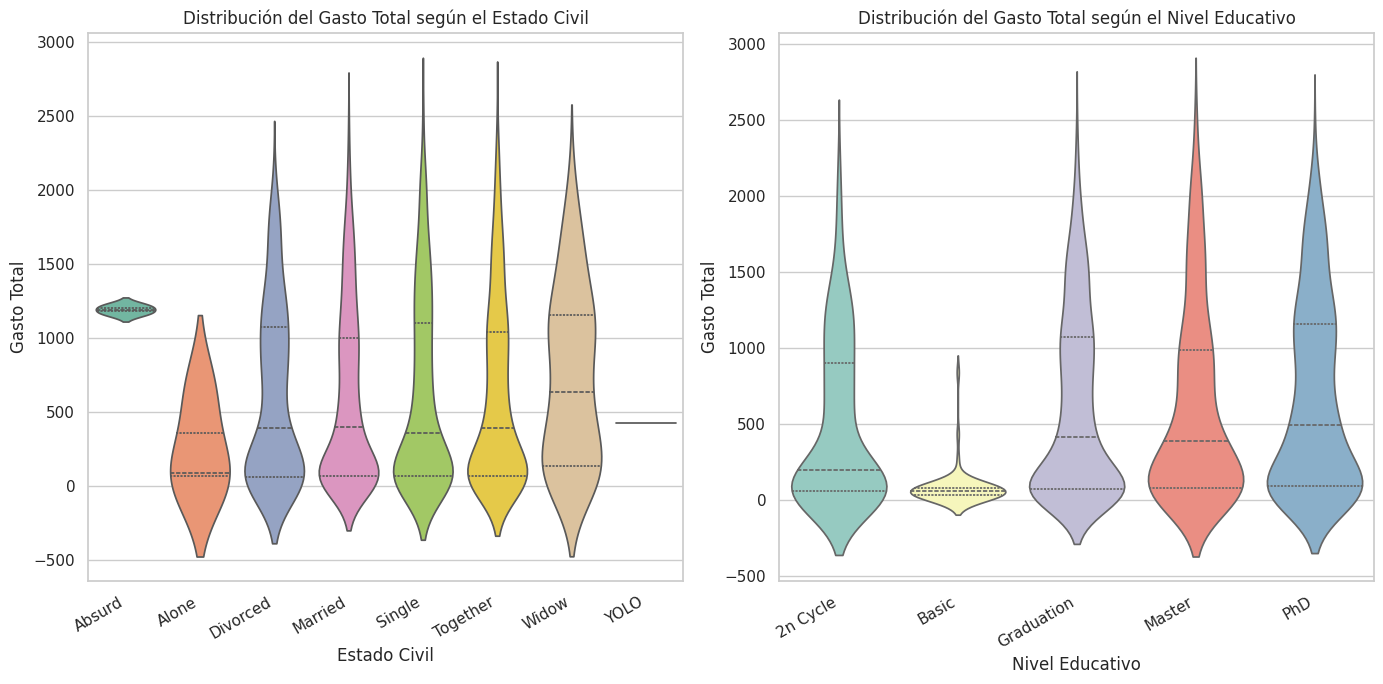

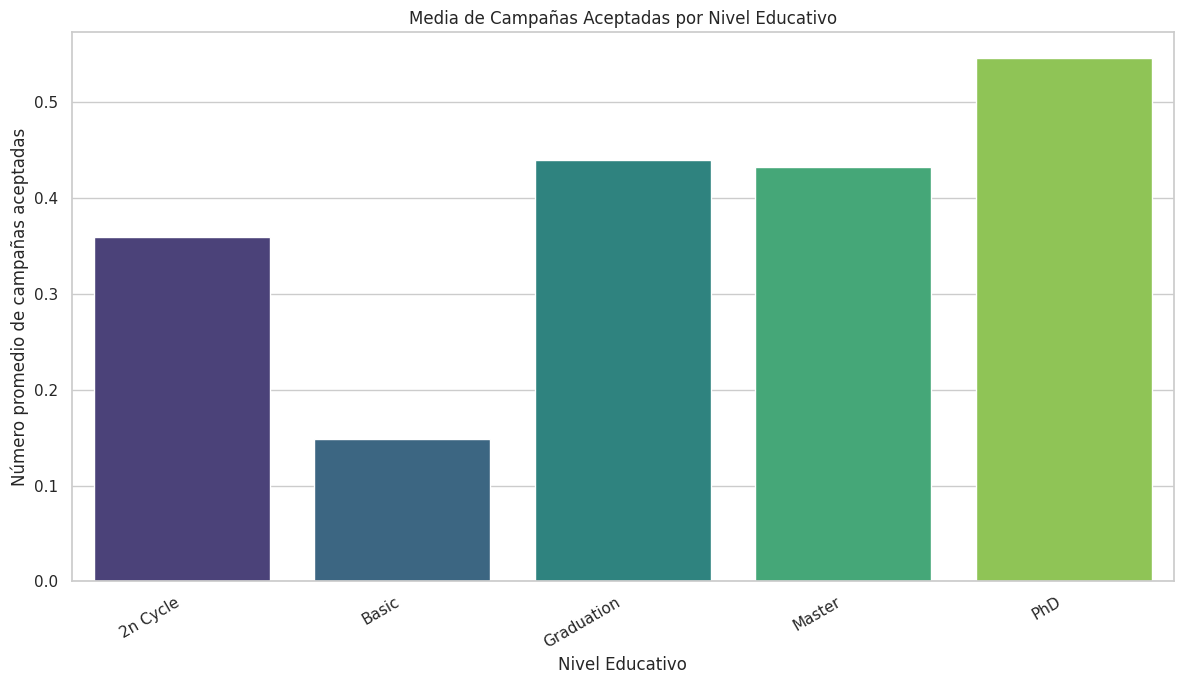

In [45]:
# Explorando la relación entre variables categóricas y el gasto total
plt.figure(figsize=(14, 7))

plt.subplot(1, 2, 1)
sns.violinplot(x='Marital_Status', y='Gasto_Total', data=df, inner='quartile', palette='Set2')
plt.title('Distribución del Gasto Total según el Estado Civil')
plt.xlabel('Estado Civil')
plt.ylabel('Gasto Total')
plt.xticks(rotation=30, ha='right')

plt.subplot(1, 2, 2)
sns.violinplot(x='Education', y='Gasto_Total', data=df, inner='quartile', palette='Set3')
plt.title('Distribución del Gasto Total según el Nivel Educativo')
plt.xlabel('Nivel Educativo')
plt.ylabel('Gasto Total')
plt.xticks(rotation=30, ha='right')

plt.tight_layout()
plt.savefig('gasto_segun_categoria.png')
plt.show()

# Examinando la respuesta a campañas según el nivel educativo
plt.figure(figsize=(12, 7))
respuesta_campanas_educacion = df.groupby('Education')['Campañas_Aceptadas'].mean().sort_values()
sns.barplot(x=respuesta_campanas_educacion.index, y=respuesta_campanas_educacion.values, palette='viridis')
plt.title('Media de Campañas Aceptadas por Nivel Educativo')
plt.xlabel('Nivel Educativo')
plt.ylabel('Número promedio de campañas aceptadas')
plt.xticks(rotation=30, ha='right')
plt.tight_layout()
plt.savefig('respuesta_campanas_por_educacion.png')
plt.show()

### 3.3 Segmentación por nivel de gasto

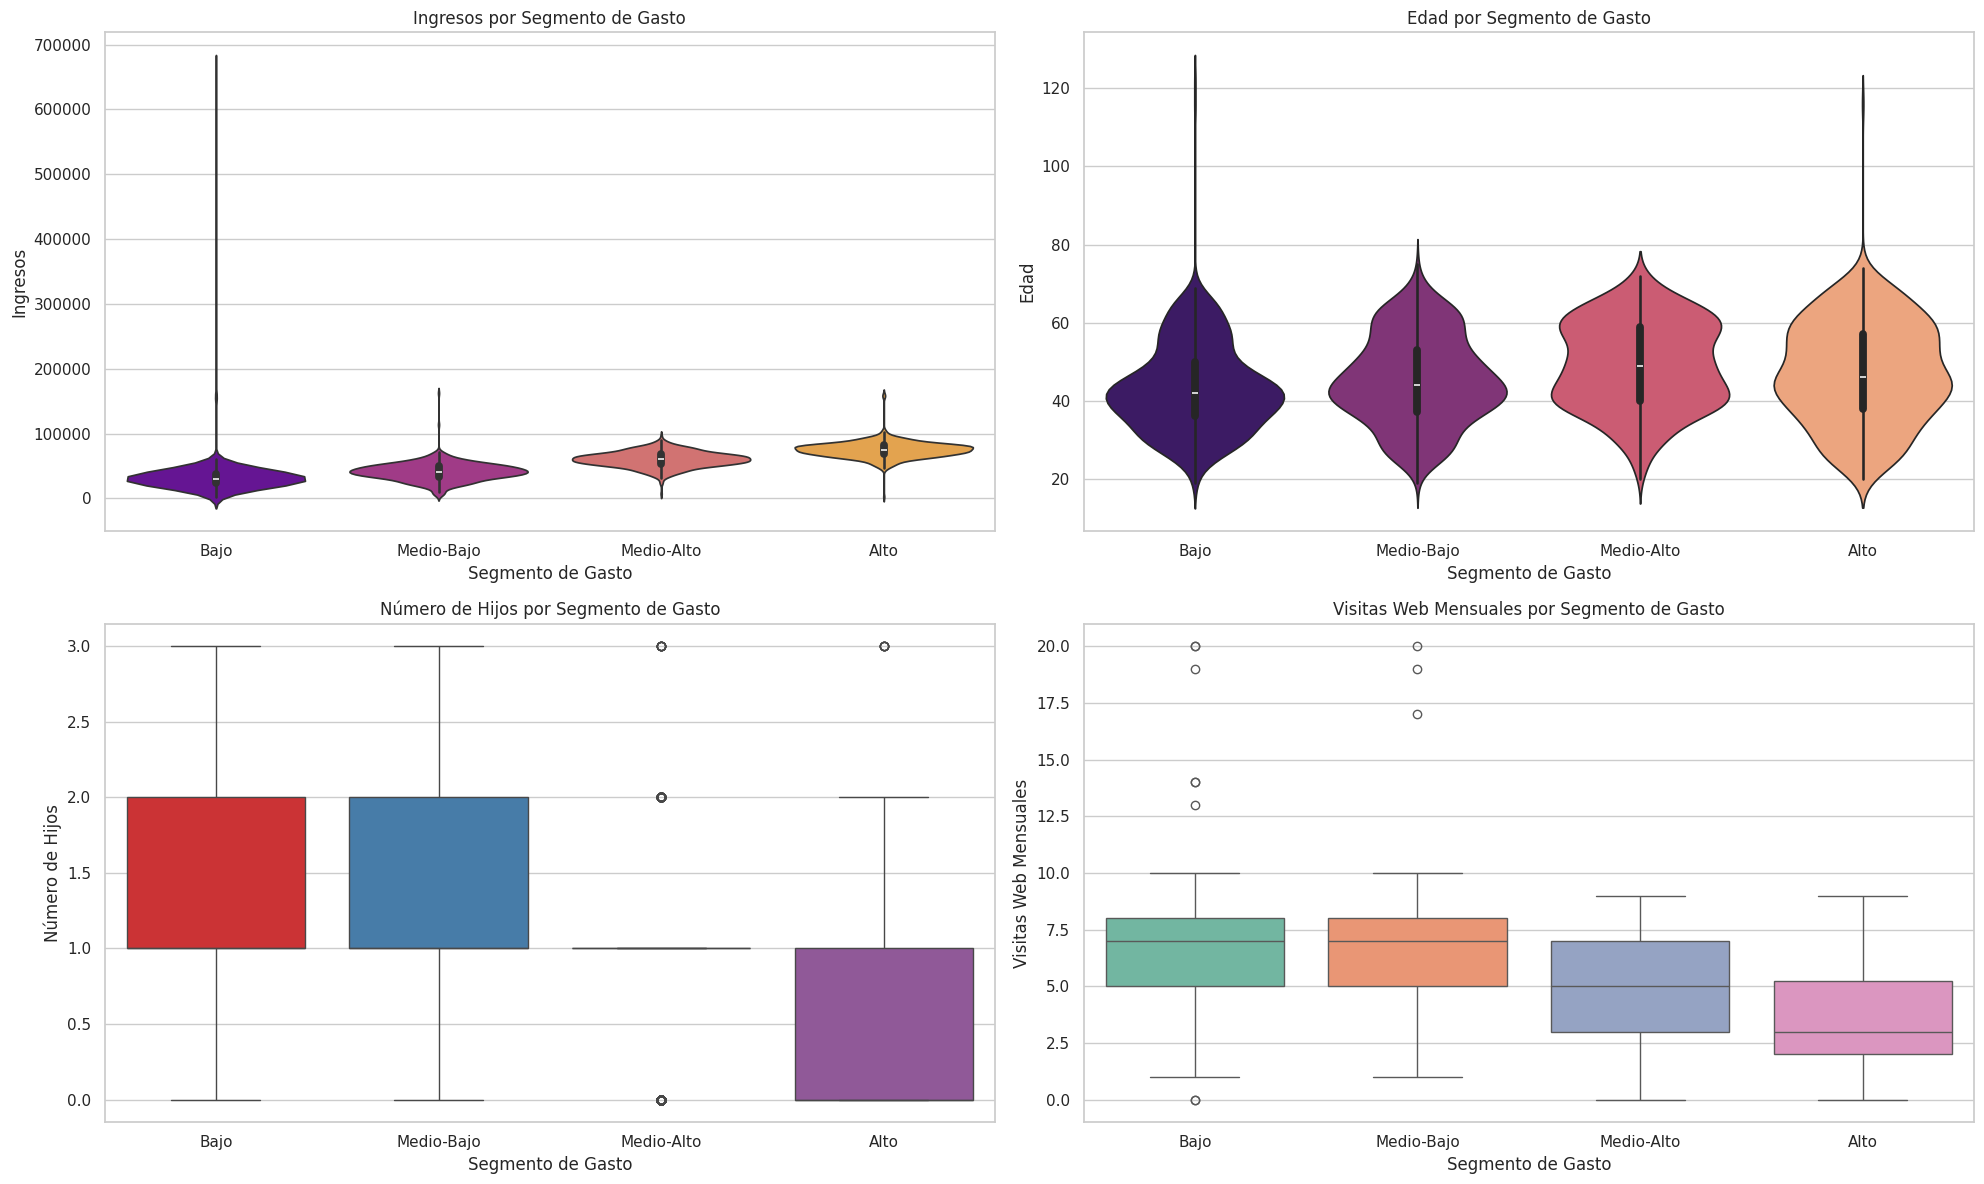

<Figure size 1400x700 with 0 Axes>

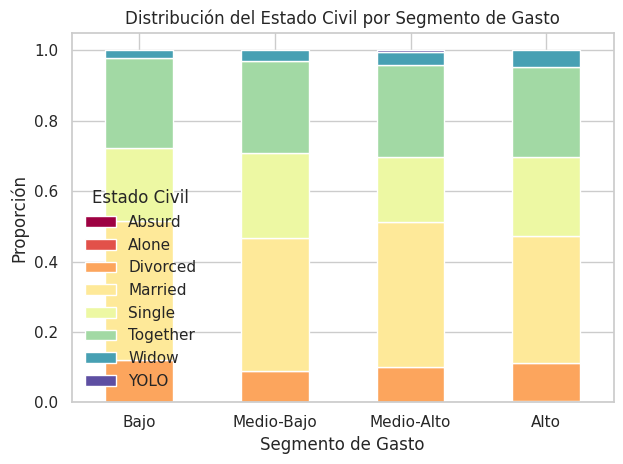

In [46]:
# Segmentación de clientes según su nivel de gasto
# Creación de segmentos de gasto basados en cuartiles
df['Segmento_Gasto'] = pd.qcut(df['Gasto_Total'],
                                q=4,
                                labels=['Bajo', 'Medio-Bajo', 'Medio-Alto', 'Alto'])

# Visualización de atributos por segmento de gasto
plt.figure(figsize=(20, 12))

# Ingresos por segmento de gasto
plt.subplot(2, 2, 1)
sns.violinplot(x='Segmento_Gasto', y='Income', data=df, palette='plasma')
plt.title('Ingresos por Segmento de Gasto')
plt.xlabel('Segmento de Gasto')
plt.ylabel('Ingresos')

# Edad por segmento de gasto
plt.subplot(2, 2, 2)
sns.violinplot(x='Segmento_Gasto', y='Edad', data=df, palette='magma')
plt.title('Edad por Segmento de Gasto')
plt.xlabel('Segmento de Gasto')
plt.ylabel('Edad')

# Número de hijos por segmento de gasto
plt.subplot(2, 2, 3)
sns.boxplot(x='Segmento_Gasto', y='Total_Hijos', data=df, palette='Set1')
plt.title('Número de Hijos por Segmento de Gasto')
plt.xlabel('Segmento de Gasto')
plt.ylabel('Número de Hijos')

# Visitas web por segmento de gasto
plt.subplot(2, 2, 4)
sns.boxplot(x='Segmento_Gasto', y='NumWebVisitsMonth', data=df, palette='Set2')
plt.title('Visitas Web Mensuales por Segmento de Gasto')
plt.xlabel('Segmento de Gasto')
plt.ylabel('Visitas Web Mensuales')

plt.tight_layout()
plt.savefig('segmentacion_nivel_gasto.png')
plt.show()

# Distribución del estado civil según el segmento de gasto
plt.figure(figsize=(14, 7))
tabla_cruzada = pd.crosstab(df['Segmento_Gasto'], df['Marital_Status'], normalize='index')
tabla_cruzada.plot(kind='bar', stacked=True, colormap='Spectral')
plt.title('Distribución del Estado Civil por Segmento de Gasto')
plt.ylabel('Proporción')
plt.xlabel('Segmento de Gasto')
plt.legend(title='Estado Civil')
plt.xticks(rotation=0)
plt.tight_layout()
plt.savefig('estado_civil_segmento_gasto.png')
plt.show()

### 3.4 Análisis de valores atípicos (outliers)


--- Análisis de Valores Extremos (Outliers) ---

Atributo: Edad
  Límite inferior: 11.00
  Límite superior: 83.00
  Número de extremos: 3 (0.13% del total)
  Valores extremos:
239    122
339    116
192    115
Name: Edad, dtype: int64

Atributo: Income
  Límite inferior: -13587.75
  Límite superior: 117416.25
  Número de extremos: 8 (0.36% del total)
  Valores extremos:
2233    666666.0
617     162397.0
687     160803.0
1300    157733.0
164     157243.0
Name: Income, dtype: float64

Atributo: Gasto_Total
  Límite inferior: -1396.38
  Límite superior: 2510.62
  Número de extremos: 3 (0.13% del total)
  Valores extremos:
1179    2525
1572    2525
1492    2524
Name: Gasto_Total, dtype: int64

Atributo: MntWines
  Límite inferior: -697.00
  Límite superior: 1225.00
  Número de extremos: 35 (1.56% del total)

Atributo: MntMeatProducts
  Límite inferior: -308.00
  Límite superior: 556.00
  Número de extremos: 175 (7.81% del total)


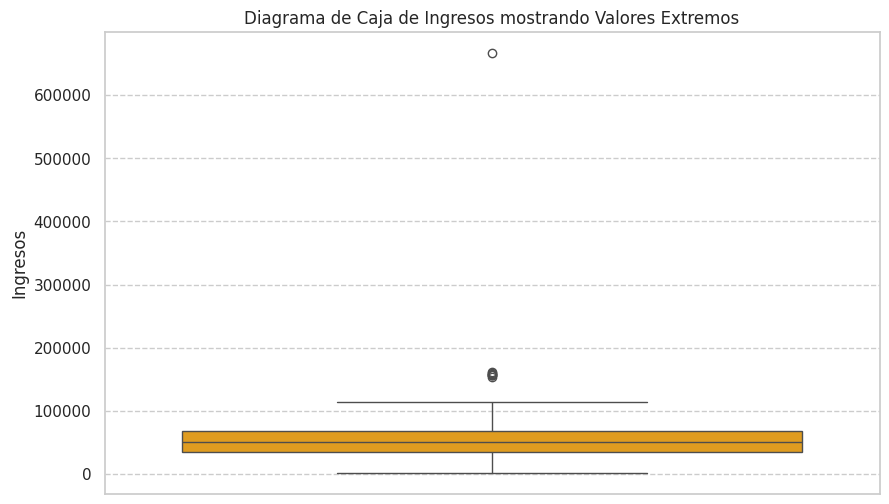

In [50]:
# Identificación de valores extremos utilizando el método del rango intercuartílico (RIQ)
def identificar_extremos(dataframe, columna):
    primer_cuartil = dataframe[columna].quantile(0.25)
    tercer_cuartil = dataframe[columna].quantile(0.75)
    riq = tercer_cuartil - primer_cuartil
    limite_inferior = primer_cuartil - 1.5 * riq
    limite_superior = tercer_cuartil + 1.5 * riq
    extremos = dataframe[(dataframe[columna] < limite_inferior) | (dataframe[columna] > limite_superior)]
    return extremos, limite_inferior, limite_superior, len(extremos)

# Análisis de valores extremos para atributos clave
print("\n--- Análisis de Valores Extremos (Outliers) ---")
atributos_outlier = ['Edad', 'Income', 'Gasto_Total', 'MntWines', 'MntMeatProducts']

for atributo in atributos_outlier:
    extremos, inferior, superior, conteo = identificar_extremos(df, atributo)
    print(f"\nAtributo: {atributo}")
    print(f"  Límite inferior: {inferior:.2f}")
    print(f"  Límite superior: {superior:.2f}")
    print(f"  Número de extremos: {conteo} ({(conteo/len(df)*100):.2f}% del total)")

    if conteo > 0 and conteo <= 10:  # Si hay pocos extremos, mostrarlos
        print("  Valores extremos:")
        print(extremos[atributo].sort_values(ascending=False).head())

# Visualización específica para valores extremos en Ingresos
plt.figure(figsize=(10, 6))
sns.boxplot(y=df['Income'], color='orange')
plt.title('Diagrama de Caja de Ingresos mostrando Valores Extremos')
plt.ylabel('Ingresos')
plt.grid(axis='y', linestyle='--')
plt.savefig('extremos_ingresos.png')
plt.show()

## 4. Análisis de correlación y relaciones entre variables

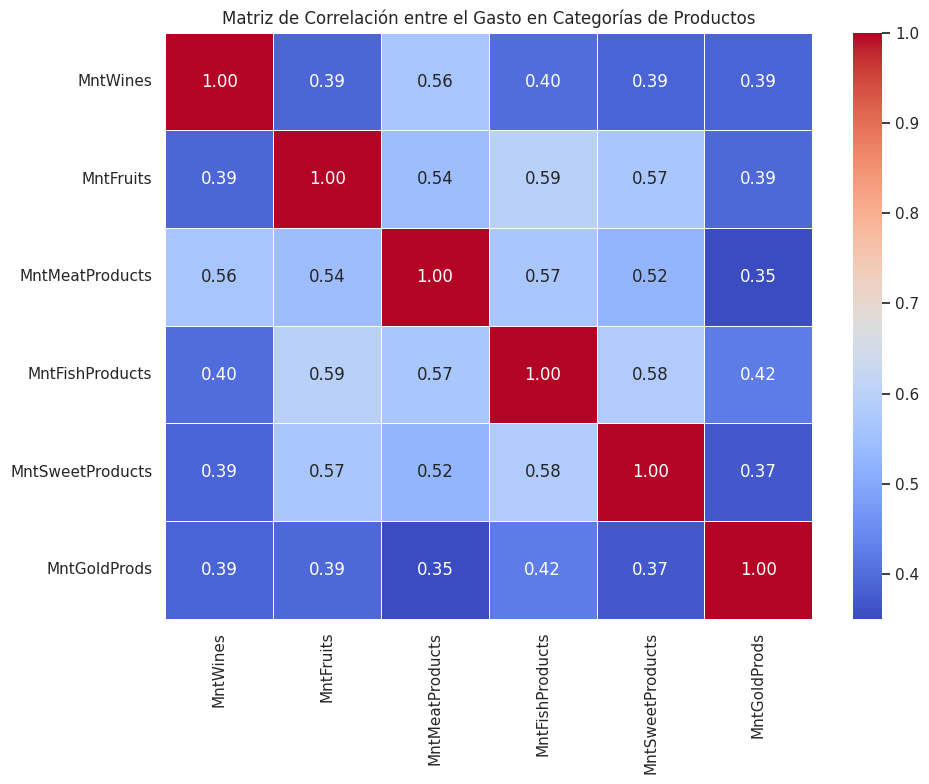

<Figure size 1200x1000 with 0 Axes>

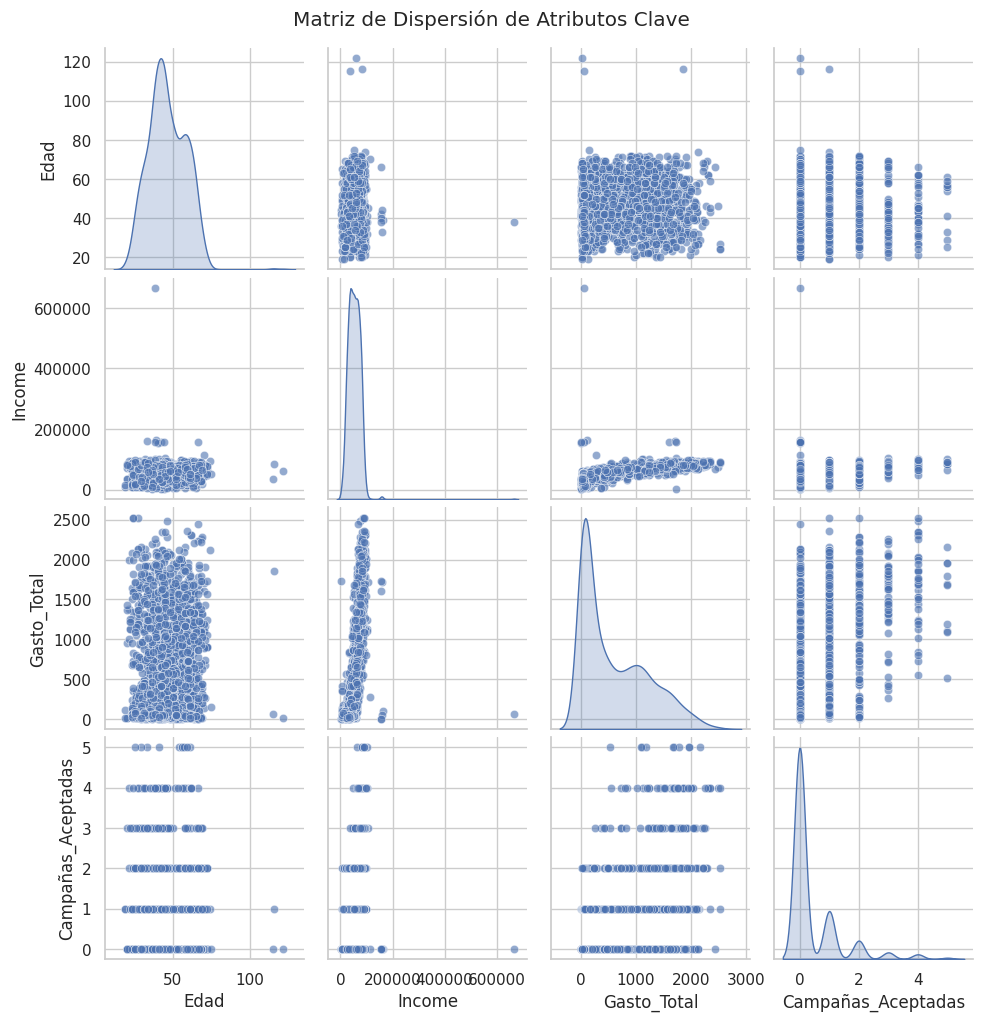

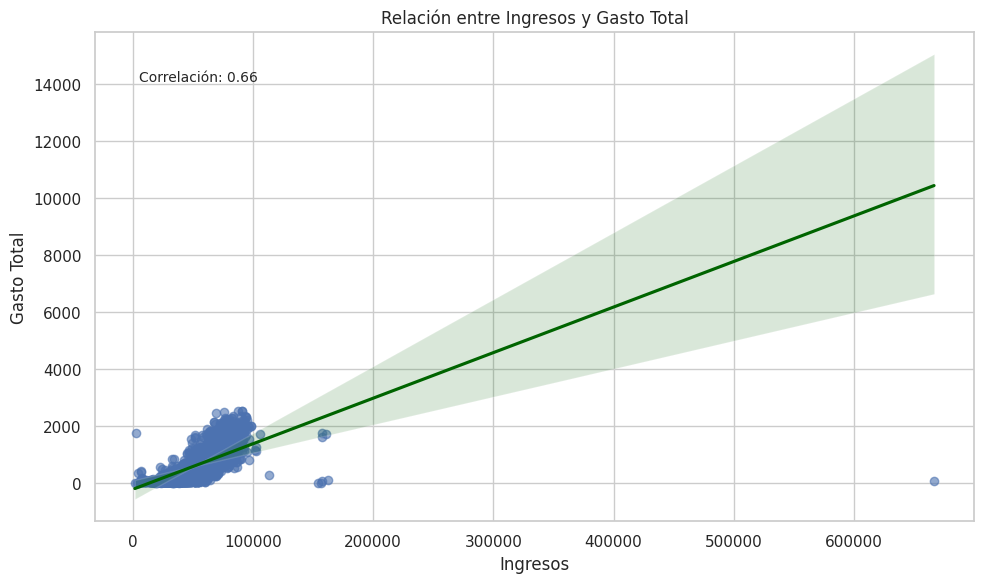

In [51]:
# Correlación entre el gasto en distintas categorías de productos
columnas_gasto = ['MntWines', 'MntFruits', 'MntMeatProducts',
                  'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']

plt.figure(figsize=(10, 8))
sns.heatmap(df[columnas_gasto].corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Matriz de Correlación entre el Gasto en Categorías de Productos')
plt.tight_layout()
plt.savefig('correlacion_gasto_productos.png')
plt.show()

# Matriz de dispersión para atributos clave
plt.figure(figsize=(12, 10))
atributos_dispersion = ['Edad', 'Income', 'Gasto_Total', 'Campañas_Aceptadas']
sns.pairplot(df[atributos_dispersion], diag_kind='kde', markers='o', plot_kws={'alpha': 0.6})
plt.suptitle('Matriz de Dispersión de Atributos Clave', y=1.02)
plt.savefig('matriz_dispersion_atributos.png')
plt.show()

# Análisis de la relación entre ingresos y gasto total
plt.figure(figsize=(10, 6))
sns.regplot(x='Income', y='Gasto_Total', data=df, scatter_kws={'alpha': 0.6}, line_kws={'color': 'darkgreen'})
plt.title('Relación entre Ingresos y Gasto Total')
plt.xlabel('Ingresos')
plt.ylabel('Gasto Total')
# Calcular y mostrar el coeficiente de correlación
correlacion = df['Income'].corr(df['Gasto_Total'])
plt.annotate(f'Correlación: {correlacion:.2f}', xy=(0.05, 0.9), xycoords='axes fraction', fontsize=10)
plt.tight_layout()
plt.savefig('relacion_ingresos_gasto_total.png')
plt.show()

## 5. Análisis de respuesta a campañas

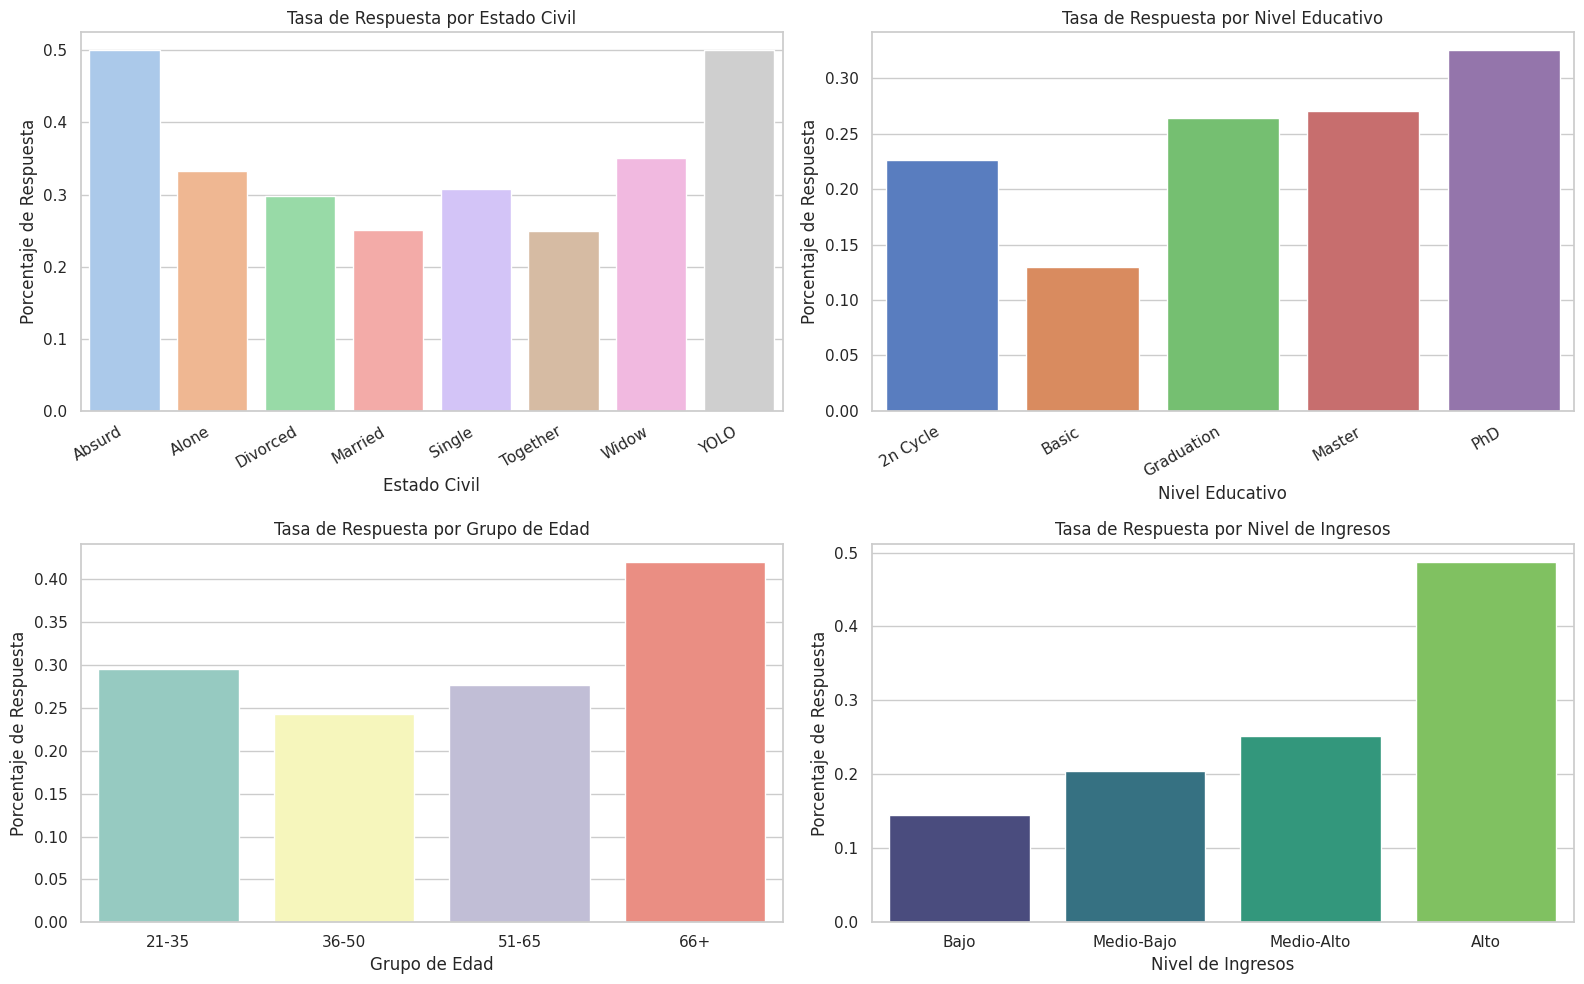

In [52]:
# Análisis de los factores que influyen en la respuesta a las campañas
# Creación de una variable indicadora de respuesta general a alguna campaña
df['Respondio_Campana'] = df['Campañas_Aceptadas'].apply(lambda x: 1 if x > 0 else 0)

# Tasa de respuesta según las características demográficas
plt.figure(figsize=(16, 10))

# Por estado civil
plt.subplot(2, 2, 1)
tasa_respuesta_civil = df.groupby('Marital_Status')['Respondio_Campana'].mean().sort_values(ascending=False)
sns.barplot(x=tasa_respuesta_civil.index, y=tasa_respuesta_civil.values, palette='pastel')
plt.title('Tasa de Respuesta por Estado Civil')
plt.ylabel('Porcentaje de Respuesta')
plt.xlabel('Estado Civil')
plt.xticks(rotation=30, ha='right')

# Por nivel educativo
plt.subplot(2, 2, 2)
tasa_respuesta_educacion = df.groupby('Education')['Respondio_Campana'].mean().sort_values(ascending=False)
sns.barplot(x=tasa_respuesta_educacion.index, y=tasa_respuesta_educacion.values, palette='muted')
plt.title('Tasa de Respuesta por Nivel Educativo')
plt.ylabel('Porcentaje de Respuesta')
plt.xlabel('Nivel Educativo')
plt.xticks(rotation=30, ha='right')

# Por grupo de edad
df['Grupo_Edad'] = pd.cut(df['Edad'], bins=[20, 35, 50, 65, 100],
                            labels=['21-35', '36-50', '51-65', '66+'])
plt.subplot(2, 2, 3)
tasa_respuesta_edad = df.groupby('Grupo_Edad')['Respondio_Campana'].mean()
sns.barplot(x=tasa_respuesta_edad.index, y=tasa_respuesta_edad.values, palette='Set3')
plt.title('Tasa de Respuesta por Grupo de Edad')
plt.ylabel('Porcentaje de Respuesta')
plt.xlabel('Grupo de Edad')

# Por nivel de ingresos
df['Nivel_Ingresos'] = pd.qcut(df['Income'], q=4,
                                labels=['Bajo', 'Medio-Bajo', 'Medio-Alto', 'Alto'])
plt.subplot(2, 2, 4)
tasa_respuesta_ingresos = df.groupby('Nivel_Ingresos')['Respondio_Campana'].mean()
sns.barplot(x=tasa_respuesta_ingresos.index, y=tasa_respuesta_ingresos.values, palette='viridis')
plt.title('Tasa de Respuesta por Nivel de Ingresos')
plt.ylabel('Porcentaje de Respuesta')
plt.xlabel('Nivel de Ingresos')

plt.tight_layout()
plt.savefig('analisis_factores_respuesta.png')
plt.show()

## 6. Conclusiones y hallazgos principales

In [54]:
## Aquí presentamos un resumen de los hallazgos principales del análisis exploratorio

print("\n=== RESUMEN DE CONCLUSIONES Y HALLAZGOS CLAVE ===\n")

# 1. Perfil demográfico de los clientes
print("1. PERFIL DEMOGRÁFICO DE LOS CLIENTES:")
print(f"  - Edad promedio: {df['Edad'].mean():.1f} años (mínima: {df['Edad'].min()}, máxima: {df['Edad'].max()})")
print(f"  - Ingresos promedio: ${df['Income'].mean():.2f}")
print(f"  - Estado civil predominante: {df['Marital_Status'].value_counts().index[0]} ({df['Marital_Status'].value_counts(normalize=True)[0]*100:.1f}%)")
print(f"  - Nivel educativo predominante: {df['Education'].value_counts().index[0]} ({df['Education'].value_counts(normalize=True)[0]*100:.1f}%)")
print(f"  - Promedio de hijos por hogar: {df['Total_Hijos'].mean():.2f}")

# 2. Patrones de gasto
print("\n2. PATRONES DE GASTO:")
print(f"  - Gasto promedio total por cliente: ${df['Gasto_Total'].mean():.2f}")
print("  - Distribución del gasto por categoría:")
gasto_promedio = df[columnas_gasto].mean().sort_values(ascending=False)
for producto, monto in gasto_promedio.items():
    porcentaje_gasto = (monto / df['Gasto_Total'].mean()) * 100 if df['Gasto_Total'].mean() != 0 else 0
    print(f"    * {producto}: ${monto:.2f} ({porcentaje_gasto:.1f}% del gasto total)")
print(f"  - Correlación Ingresos-Gasto Total: {df['Income'].corr(df['Gasto_Total']):.2f} (correlación positiva apreciable)")

# 3. Comportamiento de compra
print("\n3. COMPORTAMIENTO DE COMPRA:")
print(f"  - Promedio de compras totales: {df['Total_Compras'].mean():.2f}")
print(f"  - Promedio de visitas web mensuales: {df['NumWebVisitsMonth'].mean():.2f}")
print("  - Distribución por canal:")
canales_compra = ['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumDealsPurchases']
promedio_compra_canal = df[canales_compra].mean().sort_values(ascending=False)
for canal, promedio in promedio_compra_canal.items():
    porcentaje_compra = (promedio / df['Total_Compras'].mean()) * 100 if df['Total_Compras'].mean() != 0 else 0
    print(f"    * {canal}: {promedio:.2f} ({porcentaje_compra:.1f}% de las compras)")

# 4. Respuesta a campañas
print("\n4. RESPUESTA A CAMPAÑAS:")
print(f"  - Tasa general de respuesta a alguna campaña: {df['Respondio_Campana'].mean()*100:.2f}%")
print("  - Factores asociados con mayor respuesta:")
print(f"    * Nivel educativo: {tasa_respuesta_educacion.index[0]} presenta la mayor tasa ({tasa_respuesta_educacion.values[0]*100:.1f}%)")
print(f"    * Estado civil: {tasa_respuesta_civil.index[0]} exhibe la mayor tasa ({tasa_respuesta_civil.values[0]*100:.1f}%)")
print(f"    * Nivel de ingresos: {tasa_respuesta_ingresos.index[-1]} muestra la mayor tasa ({tasa_respuesta_ingresos.values[-1]*100:.1f}%)")

# 5. Valores atípicos y distribución
print("\n5. VALORES ATÍPICOS Y DISTRIBUCIÓN:")
print("  - Se identificaron valores extremos relevantes en las siguientes variables:")
for atributo in atributos_outlier:
    _, _, _, conteo = identificar_extremos(df, atributo)
    print(f"    * {atributo}: {conteo} valores extremos ({(conteo/len(df)*100):.1f}% de los registros)")
print("  - Distribución de atributos clave:")
for atributo in ['Edad', 'Income', 'Gasto_Total']:
    asimetria = df[atributo].skew()
    descripcion = "simétrica" if abs(asimetria) < 0.5 else "sesgada a la derecha" if asimetria > 0 else "sesgada a la izquierda"
    moda_valor = get_mode(df[atributo])
    print(f"    * {atributo}: Distribución {descripcion} (asimetría = {asimetria:.2f})")
    print(f"      Media: {df[atributo].mean():.2f}, Mediana: {df[atributo].median():.2f}, Moda: {moda_valor:.2f}")


# 6. Segmentos identificados
print("\n6. SEGMENTOS DE CLIENTES IDENTIFICADOS:")
print("  - Por nivel de gasto:")
for segmento in ['Alto', 'Medio-Alto', 'Medio-Bajo', 'Bajo']:
    segmento_data = df[df['Segmento_Gasto'] == segmento]
    porcentaje_segmento = (len(segmento_data) / len(df)) * 100 if len(df) != 0 else 0
    print(f"    * {segmento} ({porcentaje_segmento:.1f}% de clientes):")
    print(f"      Ingresos promedio: ${segmento_data['Income'].mean():.2f}")
    print(f"      Edad promedio: {segmento_data['Edad'].mean():.1f} años")
    print(f"      Hijos promedio: {segmento_data['Total_Hijos'].mean():.2f}")
    print(f"      Tasa de respuesta a campañas: {segmento_data['Respondio_Campana'].mean()*100:.1f}%")

# 7. Recomendaciones para campañas futuras
print("\n7. RECOMENDACIONES PARA CAMPAÑAS FUTURAS:")
print("  - Enfocarse en segmentos con mayor propensión a responder:")
print("    * Clientes con nivel educativo de posgrado y graduación")
print("    * Clientes con ingresos en el cuartil superior")
print("  - Personalizar ofertas por categorías de productos preferidas por cada segmento")
print("  - Considerar la predominancia del canal web para los clientes con mayor gasto")


=== RESUMEN DE CONCLUSIONES Y HALLAZGOS CLAVE ===

1. PERFIL DEMOGRÁFICO DE LOS CLIENTES:
  - Edad promedio: 46.2 años (mínima: 19, máxima: 122)
  - Ingresos promedio: $52237.98
  - Estado civil predominante: Married (38.6%)
  - Nivel educativo predominante: Graduation (50.3%)
  - Promedio de hijos por hogar: 0.95

2. PATRONES DE GASTO:
  - Gasto promedio total por cliente: $605.80
  - Distribución del gasto por categoría:
    * MntWines: $303.94 (50.2% del gasto total)
    * MntMeatProducts: $166.95 (27.6% del gasto total)
    * MntGoldProds: $44.02 (7.3% del gasto total)
    * MntFishProducts: $37.53 (6.2% del gasto total)
    * MntSweetProducts: $27.06 (4.5% del gasto total)
    * MntFruits: $26.30 (4.3% del gasto total)
  - Correlación Ingresos-Gasto Total: 0.66 (correlación positiva apreciable)

3. COMPORTAMIENTO DE COMPRA:
  - Promedio de compras totales: 14.86
  - Promedio de visitas web mensuales: 5.32
  - Distribución por canal:
    * NumStorePurchases: 5.79 (39.0% de las com